# Análisis Exploratorio

## Lectura de datos

Comenzaremos importando todas las librerías necesarias para realizar el análisis exploratorio.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, leemos los datos 

In [66]:
data = pd.read_excel("data/datos.xlsx" )

In [69]:
data.head()

,Patient nuber,Materna age [years],Pre-pregnancy weight [kg],Maternal hight [m],BMI [kg/m²],Art ut. D-resistance index [RI],Art ut. D-pulsatility index [PI],Art ut. D-Peak Systolic Velocity [PSV],Art ut. L-resistance index [RI],Art ut. L-pulsatility index [PI],...,Mean PI,Mean PSV,Bilateral notch,Gestational age at delivery [weeks],Parity,Birth weight [g],S-Flt1 [µg/L],S-PLGF [µg/L],sFLT/PLGF,Class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


In [70]:
data.columns

Index(['Patient nuber', 'Materna age [years]', 'Pre-pregnancy weight [kg]',
       ' Maternal hight [m]', 'BMI [kg/m²]', 'Art ut. D-resistance index [RI]',
       'Art ut. D-pulsatility index [PI]',
       'Art ut. D-Peak Systolic Velocity [PSV]',
       'Art ut. L-resistance index [RI]', 'Art ut. L-pulsatility index [PI]',
       'Art ut. L-Peak Systolic Velocity [PSV]', 'Mean RI', 'Mean PI',
       'Mean PSV', 'Bilateral notch', 'Gestational age at delivery [weeks]',
       'Parity', 'Birth weight [g]', 'S-Flt1 [µg/L]', 'S-PLGF [µg/L]',
       'sFLT/PLGF', 'Class'],
      dtype='object')

Vamos a eliminar la columna de **ID** ya que se trata solo de un número utilizado para identificar a cada paciente 

In [71]:
data.drop('Patient nuber', axis=1, inplace=True)

Además, vamos a renombrar las  columnas del dataframe para facilitar el acceso a ellas. 

In [72]:
data.columns=["age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "bilateralNotch", "age_delivery", "parity", "birth_weight", "S-Flt1", "S-PLGF", "sFLT/PLGF", "class"] 

In [8]:
data.head(5)

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,...,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,...,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,...,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,...,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,...,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Veamos qué dimensiones tiene el dataset:

In [9]:
data.shape

(95, 21)

Como se puede observar, está compuesto por 21 atributos (columnas) y 95 instancias (filas). Veamos ahora la descripción estadística de los datos numéricos.

In [10]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,age_delivery,parity,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,94.000000,94.000000,92.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,93.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.616912,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,61.022151,0.600000,33.871278,1.536842,13156.200000,302.825789,243.129174
std,5.084328,14.354724,0.062554,4.800613,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.705277,0.674773,4.417592,0.920344,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,22.000000,1.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.441041,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.600000,0.000000,31.000000,1.000000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.200000,0.000000,34.142857,1.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.241408,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.450000,1.000000,37.428571,2.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,41.142857,6.000000,74283.000000,1607.000000,2297.421203


In [137]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,94.000000,94.000000,92.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,93.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.616912,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,61.022151,0.600000,33.871278,1.536842,2028.621053,13156.200000,302.825789,243.129174
std,5.084328,14.354724,0.062554,4.800613,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.705277,0.674773,4.417592,0.920344,1064.507440,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,22.000000,1.000000,0.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.441041,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.600000,0.000000,31.000000,1.000000,1137.500000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.200000,0.000000,34.142857,1.000000,1910.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.241408,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.450000,1.000000,37.428571,2.000000,2945.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,41.142857,6.000000,4040.000000,74283.000000,1607.000000,2297.421203


## Filas duplicadas y valores ausentes

Comprobamos si existen filas duplicadas.

In [11]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


No existen filas duplicadas. Ahora comprobamos el número de valores nulos por cada columna.

In [12]:
data.isnull().sum()

age               0
weight            1
height            1
BMI               3
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           2
bilateralNotch    0
age_delivery      0
parity            0
birth_weight      0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

Existen valores nulos en las columnas **weight, height, BMI** y **meanPSV**. Veámos las filas que contienen valores nulos.

In [13]:
nulos = data[data.isnull().any(1)]

In [14]:
nulos

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
58,43,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,...,0.635,65.15,0,32.714286,1,1480,27390,153.60,178.320312,IUGR_PE
59,36,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,...,0.850,59.65,1,34.714286,1,1280,29805,79.73,373.824157,IUGR_PE
61,26,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,...,2.150,64.10,1,28.000000,1,MFIU,10015,42.64,234.873358,IUGR
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,...,0.540,NaN,0,34.142857,1,1570,10535,34.97,301.258221,PE
94,26,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,...,0.665,NaN,2,30.428571,1,1180,12154,15.84,767.297980,PE


Vemos que en las filas 58 y 59 falta el valor de la columna **BMI**. El **BMI** indica el índice masa corporal, que se calcula dividiendo el peso entre la altura al cuadrado. Estos dos valores ausentes serán calculados usando las columnas **weight y height**.  
En la columna 61, falta tanto el **BMI** como **weight** y **height**. Para las columnas **weight** y **height**, calcularemos el valor medio de cada columna y lo sustituiremos por el valor nulo. En cuanto el valor ausente del **BMI**, haremos como en el primer caso y lo sustituiremos por el valor de **weight** dividido entre el valor de **height** al cuadrado correspondiente.  
Por último, en la fila 93 y 94 tienen ausente el valor de **meanPSV**. El valor de esta columna corresponde con el valor medio de las columnas **R-PSV** y **L-PSV**. Calcularemos este valor medio para sustituir al valor NaN.

## Clase

En este apartado, vamos a estudiar la clase del dataset.

In [73]:
data["class"].unique()

array(['Control', 'IUGR_PE', 'IUGR', 'PE'], dtype=object)

In [74]:
data["class"].value_counts()

IUGR_PE    32
Control    29
PE         22
IUGR       12
Name: class, dtype: int64

La clase puede tener cuatro valores distintos: *Control, IUGR_PE, IUGR y PE*. Por lo tanto, nos encontramos frente a un problema de clasificación multiclase. 

| Variable | Descripción |Número de pacientes|
| :- | :- | :- |
| IUGR_PE | Preeclampsia y restricción intrauterina del incremento | 32 |
| Control| No padece ninguna de las dos enfermedades | 29 |
| PE    | Preeclampsia | 22 |
| IUGR    | Restricción intrauterina del incremento | 12 |

Visualicemos cómo sería la distribución de la clase.

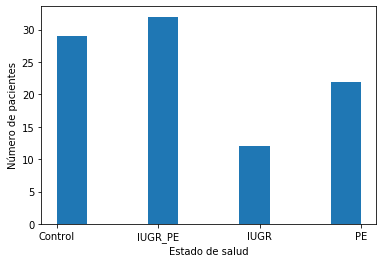

In [78]:
data["class"].hist(grid=False)
plt.xlabel("Estado de salud")
plt.ylabel("Número de pacientes")
plt.show()

Vemos que la clase se encuentra desbalanceada (sobre todo para el valor IUGR).

## Tipo de variables

Vamos a estudiar qué tipos de variables tenemos en el dataset. 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
age               95 non-null int64
weight            94 non-null float64
height            94 non-null float64
BMI               92 non-null float64
R-RI              95 non-null float64
R-PI              95 non-null float64
R-PSV             95 non-null float64
L-RI              95 non-null float64
L-PI              95 non-null float64
L-PSV             95 non-null float64
meanRI            95 non-null float64
meanPI            95 non-null float64
meanPSV           93 non-null float64
bilateralNotch    95 non-null int64
age_delivery      95 non-null float64
parity            95 non-null int64
birth_weight      95 non-null object
S-Flt1            95 non-null int64
S-PLGF            95 non-null float64
sFLT/PLGF         95 non-null float64
class             95 non-null object
dtypes: float64(15), int64(4), object(2)
memory usage: 15.7+ KB


Como se puede observar, hemos obtenido que dos variables son de tipo _object_. Veámos esto en más profundidad 

In [19]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['birth_weight', 'class']

La columna **class** es efectivamente categórica, pero la variable **birth_weight** debería ser del tipo _float_ ya que se trata del peso del neonato. Veámos qué está ocurriendo. Para ello, vamos a ver los distintos valores que puede adoptar el peso del neonato.

In [79]:
data["birth_weight"].unique()

array([3060, 2780, 2450, 2490, 1905, 2180, 1910, 2600, 3110, 1510, 3550,
       3310, 3600, 2860, 2650, 3575, 1890, 3090, 3700, 2890, 2430, 3890,
       3750, 3250, 3560, 1790, 3610, 1250, 3500, 430, 1470, 2050, 1700,
       1680, 1930, 500, 1760, 530, 1210, 985, 780, 1200, 980, 1140, 1950,
       965, 830, 810, 2460, 1800, 1970, 2810, 2120, 3175, 1050, 1345,
       1480, 1280, 1150, 'MFIU', 890, 2940, 1840, 720, 1135, 650, 2160,
       930, 3070, 220, 4040, 3800, 1690, 3170, 3040, 37, 1610, 2100, 1020,
       4000, 3030, 850, 3300, 2950, 2440, 427, 2930, 1570, 1180],
      dtype=object)

Vemos que uno de los valores es **MFIU**. Este valor es de tipo String, y había provocado que se detectara la columna del tipo object. MFIU significa **muerte fetal intrauterina**. Vamos a cambiar este valor por el valor 0, y vamos a transformar el atributo en numérico.

In [80]:
data.loc[data.birth_weight=='MFIU','birth_weight']=0

data["birth_weight"]= pd.to_numeric(data["birth_weight"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
age               95 non-null int64
weight            94 non-null float64
height            94 non-null float64
BMI               92 non-null float64
R-RI              95 non-null float64
R-PI              95 non-null float64
R-PSV             95 non-null float64
L-RI              95 non-null float64
L-PI              95 non-null float64
L-PSV             95 non-null float64
meanRI            95 non-null float64
meanPI            95 non-null float64
meanPSV           93 non-null float64
bilateralNotch    95 non-null int64
age_delivery      95 non-null float64
parity            95 non-null int64
birth_weight      95 non-null int64
S-Flt1            95 non-null int64
S-PLGF            95 non-null float64
sFLT/PLGF         95 non-null float64
class             95 non-null object
dtypes: float64(15), int64(5), object(1)
memory usage: 15.7+ KB


En cuanto a las variables numéricas, veamos cuáles son continuas y cuáles discretas.

In [85]:
disc_vars = [var for var in data.columns if data[var].dtype == 'int64']
disc_vars

['age', 'bilateralNotch', 'parity', 'birth_weight', 'S-Flt1']

La variable **S-Flt1** debería ser del tipo float. 

In [86]:
data["S-Flt1"]= data["S-Flt1"].astype(float)

In [87]:
cont_vars = [var for var in data.columns if data[var].dtype == 'float64']
cont_vars

['weight',
 'height',
 'BMI',
 'R-RI',
 'R-PI',
 'R-PSV',
 'L-RI',
 'L-PI',
 'L-PSV',
 'meanRI',
 'meanPI',
 'meanPSV',
 'age_delivery',
 'S-Flt1',
 'S-PLGF',
 'sFLT/PLGF']

## Análisis variables temporales

In [23]:
aux= data[["class", 'age_delivery']]
aux
aux.groupby("class").mean()

,age_delivery
class,
Control,36.921182
IUGR,31.666667
IUGR_PE,31.903571
PE,33.915584


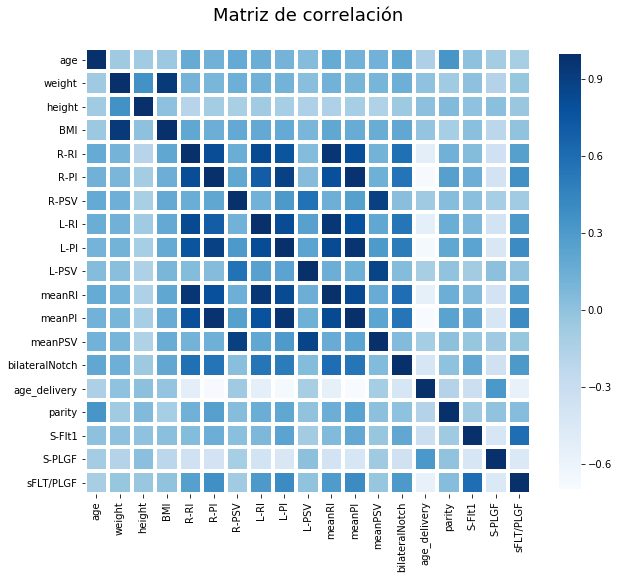

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))# plot heatmap
corr = data.corr()
graph=sns.heatmap(corr, cmap="Blues", linewidth=3, square= True,cbar_kws={"shrink": .8})

title = 'Matriz de correlación\n'
bottom, top = graph.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize=18)
plt.show()

In [25]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [26]:
correlacion =pd.DataFrame(sol, columns=["Correlación"])
correlacion.head(15)

,,Correlación
R-PI,meanPI,0.974681
L-PI,meanPI,0.971184
R-RI,meanRI,0.963732
L-RI,meanRI,0.950348
weight,BMI,0.931485
R-PSV,meanPSV,0.896657
R-PI,L-PI,0.893303
L-PSV,meanPSV,0.873123
R-RI,L-RI,0.832834
meanRI,meanPI,0.830788


METER UNAS GRÁFICAS CON LA RELACIÓN DE LA SEMANA EN LA QUE SE HA DADO A LUZ Y EL PESO DEL NEONATO, EN FUNCIÓN DE LA CLASSE Y PONER UNA LINEA CON LA MEDIA

GRÁFICA CON LA EDAD DE LAS EMBARAZADAS EN FUNCIÓN DE SI TIENE UNA AFECCIÓN¿???

PESO DEL BEBE Y SI TIENE UNA ENFERMEDAD O NO


In [119]:
data

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,...,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,...,0.580,59.60,0,37.285714,1,3060,11511.0,102.80,111.974708,Control
1,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,...,0.635,67.70,0,36.714286,3,2780,3146.0,752.80,4.179065,Control
2,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,...,0.610,61.00,0,35.142857,1,2450,3858.0,203.20,18.986220,Control
3,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,...,0.980,64.80,0,36.428571,2,2490,995.0,1051.00,0.946717,Control
4,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,...,0.820,58.60,0,32.142857,1,1905,1667.0,1440.00,1.157639,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,29,52.0,1.63,19.571681,0.61,1.02,70.4,0.55,0.85,57.7,...,0.935,64.05,0,35.714286,1,2440,22354.0,75.26,297.023651,PE
91,27,52.0,1.66,18.870663,0.83,2.27,72.5,0.80,2.12,70.3,...,2.195,71.40,1,22.000000,1,427,12401.0,31.95,388.137715,PE
92,33,70.0,1.73,23.388687,0.62,0.72,58.4,0.59,0.79,56.9,...,0.755,57.65,0,36.857143,1,2930,18015.0,96.39,186.896981,PE
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,...,0.540,NaN,0,34.142857,1,1570,10535.0,34.97,301.258221,PE


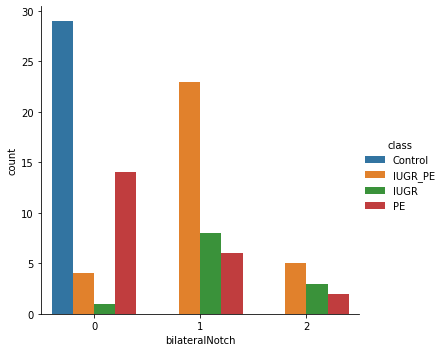

In [158]:
sns.catplot(x="bilateralNotch", hue="class", kind="count",  data=data)


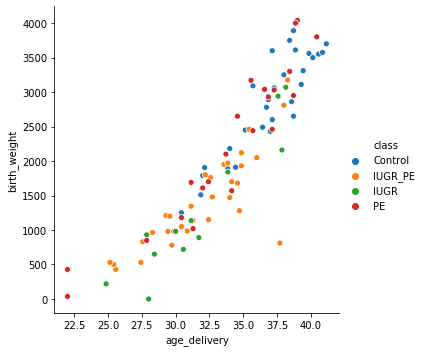

In [151]:
sns.relplot(x="age_delivery", y="birth_weight", hue="class", data=data);

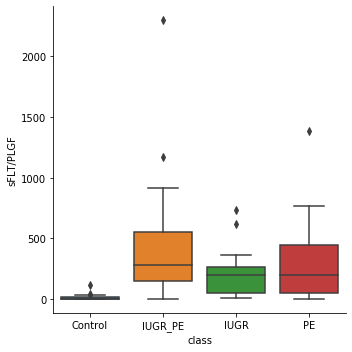

In [141]:
sns.catplot(y= "sFLT/PLGF" , x='class', data=data, orient="v", kind="box")



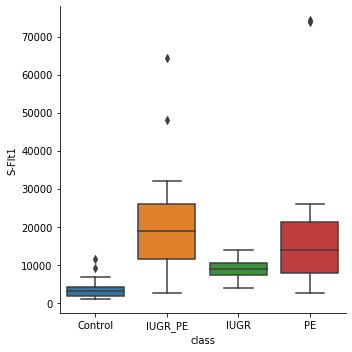

In [146]:
sns.catplot(y= "S-Flt1" , x='class', data=data, orient="v", kind="box")

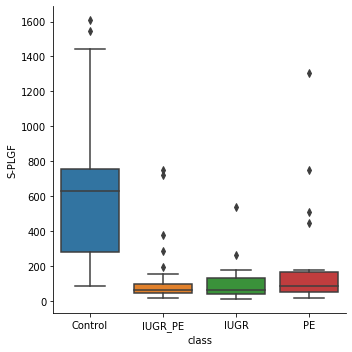

In [147]:
sns.catplot(y= "S-PLGF" , x='class', data=data, orient="v", kind="box")
